# Mod-Shift Vetting Example

Mod-shift is a python implentation of part of the Model-Shift Uniqueness Test used in the Kepler Robovetter pipeline (Thompson et al. 2018 ApJS 235:38, section A.3.4). If a TCE under investigation is truly a planet candidate, there should not be any other transit-like events in the folded light curve with a depth, duration, and period similar to the primary signal, in either the positive or negative flux directions. Many false positives are
due to noisy, quasi-periodic signals and thus are not unique in the phased light curve.

The mod-shift vetter returns sigma-pri, sigma-sec, sigma-ter and sigma-pos for the significance of the primary, secondary, terciary and the largest positive flux, respectively. The vetter also reports the false alarm statistic assuming gaussian noise and the ratio of the red noise (at the timescale of the transit duration) to the white noise (FRed) bycomputing the standard deviation of the best-fit depths at phases outside of the primary and secondary events.

In [1]:
from exovetter.tce import Tce
from exovetter import vetters as vet
from exovetter import const as exo_const
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

## Setup
Exovetter vetting alogrithms use TCE and lightkurve objects as input

In [2]:
# WASP-18 b TCE:
period = 0.94145223 * u.day
epoch = 1354.4579 * u.day
epoch_offset = exo_const.btjd
depth = 0.00931894 * exo_const.frac_amp
duration = 0.08932 * u.day

# create a TCE object using the exovetter.tce.Tce class
tce = Tce(period=period, epoch=epoch, epoch_offset=epoch_offset, 
          depth=depth, duration=duration, comment='example')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 1354.4579 d>,
 'epoch_offset': <Quantity -2457000. d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'comment': 'example'}

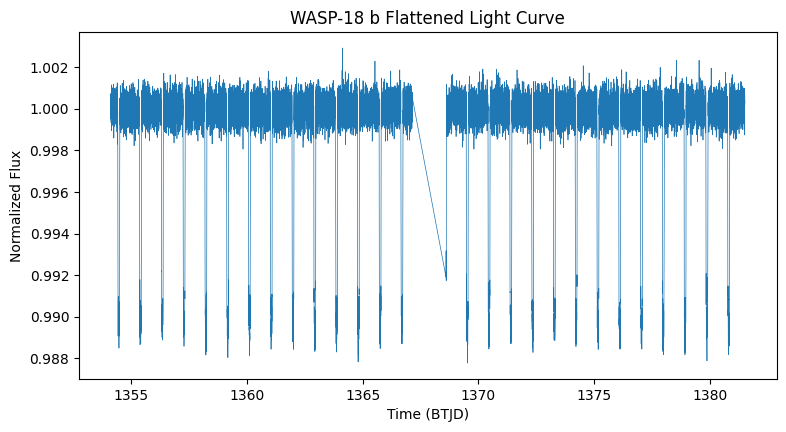

In [3]:
# Read in the flattened WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure(figsize=(9,4.5))
plt.plot(lc.time.value, lc.flux.value, lw=0.5) 
plt.title('WASP-18 b Flattened Light Curve')
plt.xlabel('Time (BTJD)')
plt.ylabel('Normalized Flux')
plt.show()

## Vetting

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.Modshift`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
modshift_instance = vet.ModShift()
modshift_results = modshift_instance.run(tce, lc)

modshift_results

{'pri': 0,
 'phase_pri': 0.0,
 'sec': 0,
 'phase_sec': 0.0,
 'ter': 0,
 'phase_ter': 0.0,
 'pos': 62,
 'phase_pos': 0.5559051262857143,
 'sigma_pri': -84048.82717694924,
 'sigma_sec': -84048.82717694924,
 'sigma_ter': -84048.82717694924,
 'sigma_pos': 874.9368307842159,
 'false_alarm_threshold': 1.6702257749203022,
 'Fred': 98.33624740560738}

In modshift, the results are as follows: 
* pri : primary signal depth
* sec : secondary signal depth
* ter : tertiary signal depth
* pos : largest positive event excursion
* false_alarm_threshold : threshold for the 1 sigma false alarm assuming gaussian noise
* Fred : red noise level -- standard deviation of the convolved light curve divided by the standard deviation of the light curve.
* sigma_pri : significance of the primary event
* sigma_sec : significance of the second largest event 
* sigma_ter : significance of the third largest event
* sigma_pos : significance of the large positive going event

The following attributes are also available after running the vetter object:
* time : Time values of the TCE.
* flux : Flux values of the TCE.
* period_days : Period of the TCE in days.
* epoch_days : Epoch of the TCE in days.
* duration_hrs : Transit duration of the TCE in hours.
* box : Flux from boxcar model of the TCE.
* metrics : Modshift results dictionary.

When used in vetting, the significance values need to be compared to the Fred or the primary significance. For example, vetters used for the Kepler Robovetter (See equations 14, 15, and 16 of Thompson et al. (2018)) used the following vetters.
* sigma_pri/Fred 
* sigma_pri - sigma_ter
* sigma_pri - sigma_pos

## Plots
In order to generate diagnostic plots from vetters, we use the `plot` method with the vetter object after it has been run.

<Figure size 640x480 with 0 Axes>

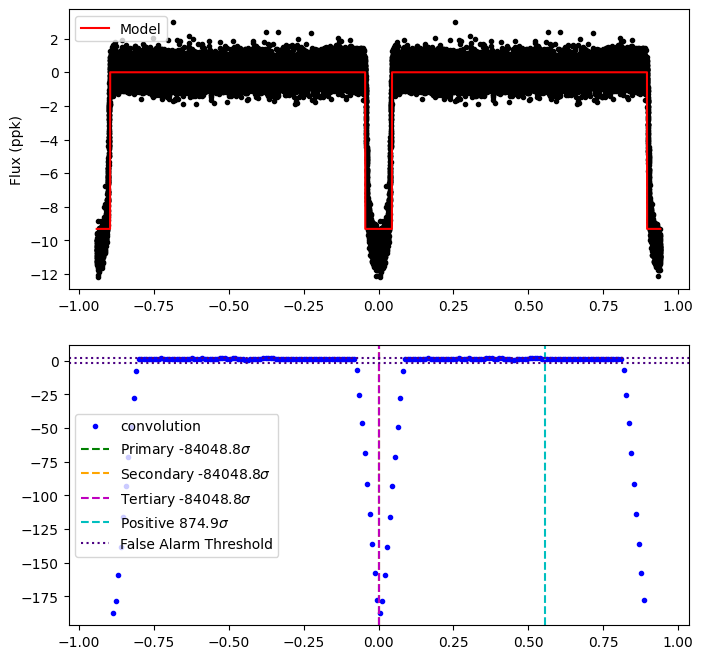

In [5]:
plt.figure()
modshift_instance.plot()
plt.show()

The same plots are made when using `plot=True` during the `run` method.

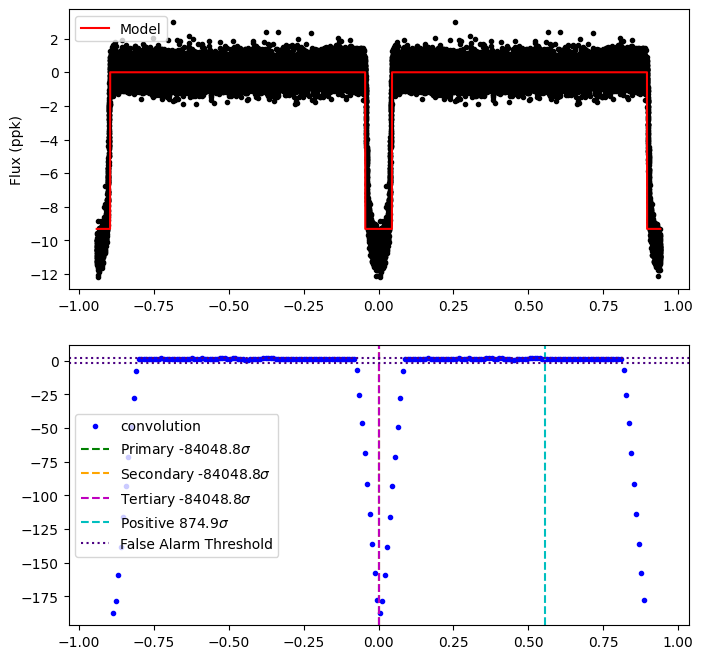

In [6]:
modshift_results = modshift_instance.run(tce, lc, plot=True)